<a href="https://colab.research.google.com/github/Abdelrahmanemad0/Spam-or-not-spam/blob/main/Copy_of_email_spam_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a id="top"></a>
<div style="text-align: center; background: #ff8c00; font-family: 'Montserrat', sans-serif; color: white; padding: 15px; font-size: 30px; font-weight: bold; line-height: 1; border-radius: 20px 20px 0 0; margin-bottom: 20px; box-shadow: 0px 4px 6px rgba(0, 0, 0, 0.2);">🚀 SMS Spam Classification: Detecting Unwanted Messages 🚀</div>
<div style="text-align: center;">
    <img src="https://miro.medium.com/v2/resize:fit:720/format:webp/0*mbFBPcPUJD-53v3h.png">
</div>


<a id="2"></a>
<div style="text-align: center; background: #1ED760; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 15px; font-size: 26px; font-weight: bold; line-height: 1; border-radius: 50% 0 50% 0 / 40px; margin-bottom: 20px; box-shadow: 0px 4px 6px rgba(0, 0, 0, 0.1);">2. Problem Statement</div>


<span style="font-size: 14px; font-family: Verdana; border: 2px solid #ccc;background-color: #F5F5F5; padding: 10px; border-radius: 10px; display: inline-block; margin-bottom: 20px;">
  The primary goal of this notebook is to develop a predictive model that accurately classifies incoming SMS messages as either <span style="background-color: #FF5733; color: white; font-weight: bold; padding: 3px 6px; border-radius: 3px;">ham</span> or <span style="background-color: #FF5733; color: white; font-weight: bold; padding: 3px 6px; border-radius: 3px;">spam</span>. We will use the SMS Spam Collection dataset, which consists of 5,574 SMS messages tagged with their respective labels.
</span>


<a id="3"></a>
<div style="text-align: center; background: #1ED760; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 15px; font-size: 26px; font-weight: bold; line-height: 1; border-radius: 50% 0 50% 0 / 40px; margin-bottom: 20px; box-shadow: 0px 4px 6px rgba(0, 0, 0, 0.1);">3. Data Checks to Perform 🔍</div>

<div style="text-align: center; background:  #FF00CC; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 15px; font-size: 26px; font-weight: bold; line-height: 1; border-radius: 50% 0 50% 0 / 40px; margin-bottom: 20px; box-shadow: 0px 4px 6px rgba(0, 0, 0, 0.1);">3.1 Import Necessary Libraries</div>


In [ ]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Importing WordCloud for text visualization
from wordcloud import WordCloud

# Importing NLTK for natural language processing
import nltk
# Downloading NLTK data
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

<div style="text-align: center; background:  #FF00CC; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 15px; font-size: 26px; font-weight: bold; line-height: 1; border-radius: 50% 0 50% 0 / 40px; margin-bottom: 20px; box-shadow: 0px 4px 6px rgba(0, 0, 0, 0.1);">3.2 Load the Data</div>


In [ ]:
df = pd.read_csv('email_dataset.csv', encoding='latin1') # by defulat = utf-8
df.head()

,v2,v1
0,"Go until jurong point, crazy.. Available only ...",ham
1,Ok lar... Joking wif u oni...,ham
2,Free entry in 2 a wkly comp to win FA Cup fina...,spam
3,U dun say so early hor... U c already then say...,ham
4,"Nah I don't think he goes to usf, he lives aro...",ham


<a id="4"></a>
<div style="text-align: center; background:  #FF00CC; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 15px; font-size: 26px; font-weight: bold; line-height: 1; border-radius: 50% 0 50% 0 / 40px; margin-bottom: 20px; box-shadow: 0px 4px 6px rgba(0, 0, 0, 0.1);">4. Data Cleaning</div>


> <span style='font-size:15px; font-family:Verdana;color: #FF00CC;'><b>4.1 | Data Info</b></span>

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v2      5572 non-null   object
 1   v1      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


> <span style='font-size:15px; font-family:Verdana;color: #FF00CC;'><b>4.2 | Rename the Column</b></span>

In [ ]:
  # Rename the columns name
df.rename(columns = {'v1': 'target', 'v2': 'email'}, inplace = True)

> <span style='font-size:15px; font-family:Verdana;color: #FF00CC;'><b>4.4 | Convert the target variable</b></span>

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['target'] = encoder.fit_transform(df['target'])

In [ ]:
df.head() # 0 =>ham , 1 =>spam

,email,target
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0


> <span style='font-size:15px; font-family:Verdana;color: #FF00CC;'><b>4.5 | Check Missing values</b></span>

In [ ]:
#checking missing values
df.isnull().sum()

,0
email,0
target,0


> <span style='font-size:15px; font-family:Verdana;color: #FF00CC;'><b>4.6 | Check Duplicate values</b></span>

In [ ]:
#check duplicate values
df.duplicated().sum()

403

> <span style='font-size:15px; font-family:Verdana;color: #FF00CC;'><b>4.7 | Remove Duplicate values</b></span>

In [ ]:
#remove Duplicate
df = df.drop_duplicates()

> <span style='font-size:15px; font-family:Verdana;color: #FF00CC;'><b>4.8 | Shape of the Dataset</b></span>

In [ ]:
df.shape

(5169, 2)

<a id="5"></a>
<div style="text-align: center; background:  #FF00CC; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 15px; font-size: 26px; font-weight: bold; line-height: 1; border-radius: 50% 0 50% 0 / 40px; margin-bottom: 20px; box-shadow: 0px 4px 6px rgba(0, 0, 0, 0.1);">5. EDA</div>


> <span style='font-size:15px; font-family:Verdana;color: #FF00CC;'><b>5.1 | Percentage of Ham and Spam</b></span>

In [ ]:
values = df['target'].value_counts()
total = values.sum()

percentage_0 = (values[0] /total) * 100
percentage_1 = (values[1]/ total) *100

print('percentage of 0 :' ,percentage_0)
print('percentage of 1 :' ,percentage_1)

percentage of 0 : 87.3669955503966
percentage of 1 : 12.633004449603405


In [ ]:
# or use
values = df['target'].value_counts(normalize=False) #
values

,count
target,
0,4516
1,653


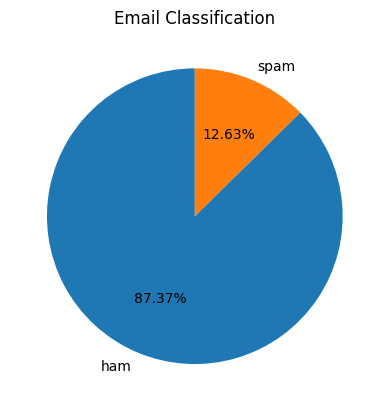

In [ ]:
import matplotlib.pyplot as plt

# Sample data
plt.pie(values, labels=['ham', 'spam'], autopct='%1.2f%%', startangle=90)
plt.title('Email Classification')
plt.show()

<a id="6"></a>
<div style="text-align: center; background:  #FF00CC; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 15px; font-size: 26px; font-weight: bold; line-height: 1; border-radius: 50% 0 50% 0 / 40px; margin-bottom: 20px; box-shadow: 0px 4px 6px rgba(0, 0, 0, 0.1);">6. Data Preprocessing</div>


### Text Preprocessing Steps

1. **Lowercasing**:
   - Converts all the text to lowercase so that the text is uniform and case-insensitive.

2. **Tokenization**:
   - Breaks the text into individual words or tokens using `nltk.word_tokenize`.

3. **Removing Special Characters**:
   - It iterates through the tokens and keeps only alphanumeric tokens (ignores punctuation and other special characters).

In [ ]:
def transform_text(text):
    # Transform the text to lowercase
    text = text.lower()

    # Tokenization using NLTK
    text = nltk.word_tokenize(text) # Tokenization: Breaks the text into individual words or tokens using nltk.word_tokenize

    # Removing special characters
    y = []
    for i in text:
        if i.isalnum(): # is alphanumeric
            y.append(i)

    # Removing stop words and punctuation
    text = y[:]

    # Join the processed tokens back into a single string
    return " ".join(text)

In [ ]:
transform_text('Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...')

'go until jurong point crazy available only in bugis n great world la e buffet cine there got amore wat'

> <span style='font-size:15px; font-family:Verdana;color: #FF00CC;'><b>6.1 | Creating a New Column: 'transformed_text'</b></span>

In [ ]:
df['transformed_email'] = df['email'].apply(transform_text)

In [ ]:
df.head(5)

,email,target,transformed_email
0,"Go until jurong point, crazy.. Available only ...",0,go until jurong point crazy available only in ...
1,Ok lar... Joking wif u oni...,0,ok lar joking wif u oni
2,Free entry in 2 a wkly comp to win FA Cup fina...,1,free entry in 2 a wkly comp to win fa cup fina...
3,U dun say so early hor... U c already then say...,0,u dun say so early hor u c already then say
4,"Nah I don't think he goes to usf, he lives aro...",0,nah i do think he goes to usf he lives around ...


> <span style='font-size:15px; font-family:Verdana;color: #FF00CC;'><b>6.2 | Word Cloud for Spam Messages</b></span>

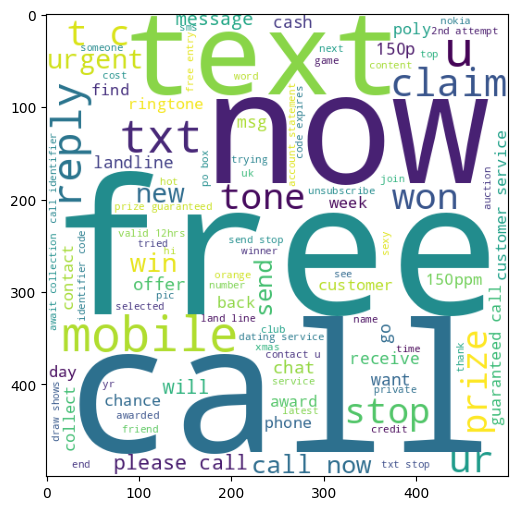

In [ ]:
wc = WordCloud(width = 500, height = 500, min_font_size = 10, background_color = 'white')
spam_wc = wc.generate(df[df['target'] == 1]['transformed_email'].str.cat(sep = " "))
plt.figure(figsize = (15,6))
plt.imshow(spam_wc)
plt.show()

> <span style='font-size:15px; font-family:Verdana;color: #FF00CC;'><b>6.2 | Word Cloud for Not spam Messages</b></span>

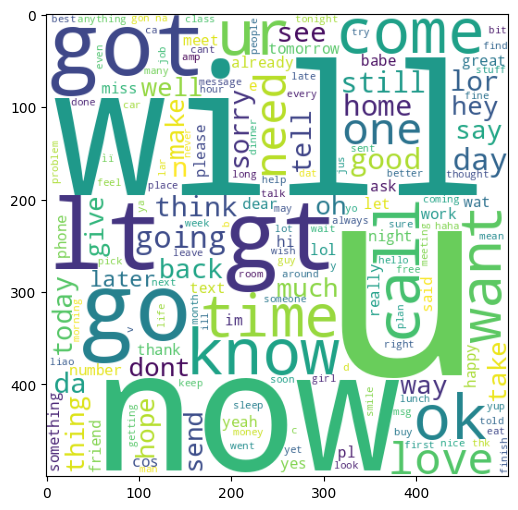

In [ ]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_email'].str.cat(sep = " "))
plt.figure(figsize = (15,6))
plt.imshow(ham_wc)
plt.show()

<a id="7"></a>
<div style="text-align: center; background: linear-gradient(to right, #FF00CC, #660066); font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 15px; font-size: 26px; font-weight: bold; line-height: 1; border-radius: 50% 0 50% 0 / 40px; margin-bottom: 20px; box-shadow: 0px 4px 6px rgba(0, 0, 0, 0.1);">7. Model Building</div>


> <span style='font-size:15px; font-family:Verdana;color: #FF00CC;'><b>7.1 | Initializing CountVectorizer and TfidfVectorizer</b></span>

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

> <span style='font-size:15px; font-family:Verdana;color: #FF00CC;'><b>7.2 | Dependent and Independent Variable</b></span>

In [ ]:
X = cv.fit_transform(df['transformed_email']).toarray()
y = df['target'].values

In [ ]:
X_df = pd.DataFrame(X)

X_df.head()

,0,1,2,3,4,5,6,7,8,9,...,8116,8117,8118,8119,8120,8121,8122,8123,8124,8125
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


> <span style='font-size:15px; font-family:Verdana;color: #FF00CC;'><b>7.3 | Split into Train and Test Data</b></span>

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test , y_train, y_test = train_test_split(X,y,test_size = 0.20, random_state = 2)

> <span style='font-size:15px; font-family:Verdana;color: #FF00CC;'><b>7.5 | Initialize the Models</b></span>

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9294003868471954

<a id="8"></a>
<div style="text-align: center; background:  #FF00CC; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 15px; font-size: 26px; font-weight: bold; line-height: 1; border-radius: 50% 0 50% 0 / 40px; margin-bottom: 20px; box-shadow: 0px 4px 6px rgba(0, 0, 0, 0.1);">8. Evaluate the Models</div>


In [ ]:
# confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

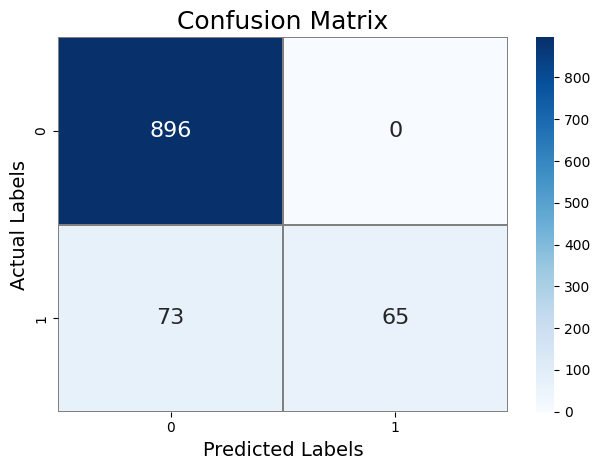

In [ ]:
import seaborn as sns

# Create a heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=True, annot_kws={"size": 16}, linewidths=0.1, linecolor='gray')

# Add titles and labels
plt.title('Confusion Matrix', fontsize=18)
plt.xlabel('Predicted Labels', fontsize=14)
plt.ylabel('Actual Labels', fontsize=14)

# Display the plot
plt.tight_layout()
plt.show()

# Task: Replace KNN with SVM and Evaluate Model Performance

In this project, your task is to **replace the K-Nearest Neighbors (KNN)** algorithm with **Support Vector Machine (SVM)** for classification.

### Steps to Follow:   
1. **Model Training**:
   - Train an SVM classifier with appropriate hyperparameters. You can experiment with different kernels (e.g., linear, RBF), regularization parameter (C), etc.
   
2. **Model Evaluation**:
   - Evaluate the performance of the SVM model by calculating key metrics such as accuracy, precision, recall, and F1-score.
   
4. **Confusion Matrix**:
   - Generate a **confusion matrix** to visualize the model's performance. This will help you understand the true positives, true negatives, false positives, and false negatives.

Good luck!


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [ ]:
df = pd.read_csv('email_dataset.csv', encoding='latin1') # by defulat = utf-8
df.head()

,v2,v1
0,"Go until jurong point, crazy.. Available only ...",ham
1,Ok lar... Joking wif u oni...,ham
2,Free entry in 2 a wkly comp to win FA Cup fina...,spam
3,U dun say so early hor... U c already then say...,ham
4,"Nah I don't think he goes to usf, he lives aro...",ham


In [ ]:
df.rename(columns={"v1": "label", "v2": "text"}, inplace=True)

In [ ]:
label_encoder = LabelEncoder()
df["label"] = label_encoder.fit_transform(df["label"])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df["text"], df["label"], test_size=0.2, random_state=101)

In [ ]:
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [ ]:
svm_model = SVC(kernel="rbf", C=1.0, random_state=42)
svm_model.fit(X_train_tfidf, y_train)

SVC(random_state=42)

In [ ]:
y_pred = svm_model.predict(X_test_tfidf)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

In [ ]:
print("Accuracy", accuracy)
print("Precision", precision)
print("Recall", recall)
print("F1-score", f1)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy 0.9811659192825112
Precision 1.0
Recall 0.8478260869565217
F1-score 0.9176470588235294
Confusion Matrix:
[[977   0]
 [ 21 117]]


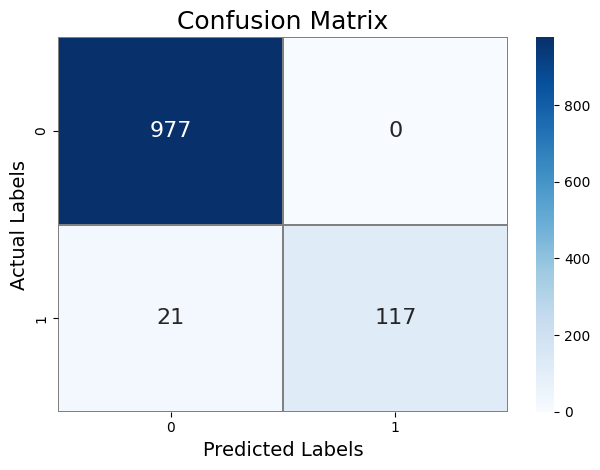

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=True, annot_kws={"size": 16}, linewidths=0.1, linecolor='gray')
plt.title('Confusion Matrix', fontsize=18)
plt.xlabel('Predicted Labels', fontsize=14)
plt.ylabel('Actual Labels', fontsize=14)
plt.tight_layout()
plt.show()